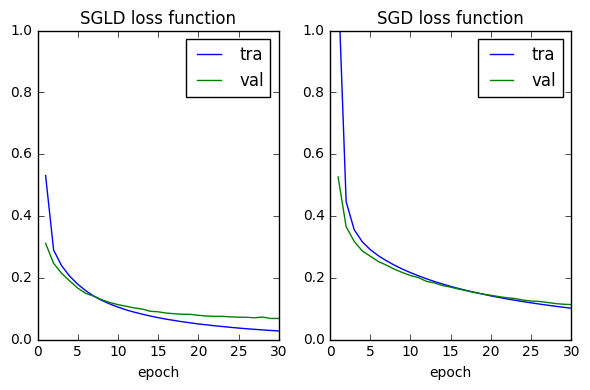

In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt

with open("SGLD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_loss = []
val_loss = []

for i in xrange(len(data)):
    tra_loss.append(data[i]["main/loss"])
    val_loss.append(data[i]["validation/main/loss"])

tra_loss = np.array(tra_loss)
val_loss = np.array(val_loss)

plt.subplot(121)
plt.plot(epoch, tra_loss, label='tra')
plt.plot(epoch, val_loss, label='val')
plt.legend(loc='best')
plt.title('SGLD loss function')
plt.xlabel('epoch')
plt.ylim(0, 1)

with open("SGD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_loss = []
val_loss = []

for i in xrange(len(data)):
    tra_loss.append(data[i]["main/loss"])
    val_loss.append(data[i]["validation/main/loss"])

tra_loss = np.array(tra_loss)
val_loss = np.array(val_loss)

plt.subplot(122)
plt.plot(epoch, tra_loss, label='tra')
plt.plot(epoch, val_loss, label='val')
plt.legend(loc='best')
plt.title('SGD loss function')
plt.xlabel('epoch')
plt.ylim(0, 1)

plt.tight_layout()

plt.show()

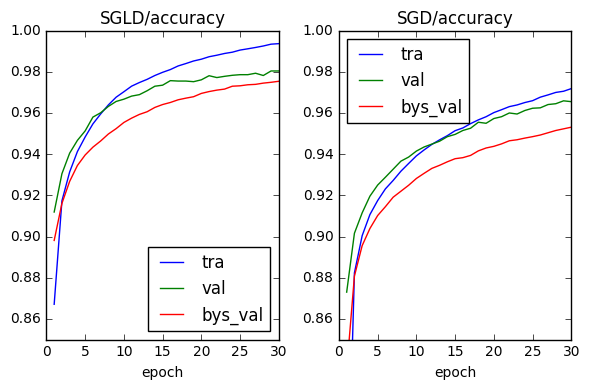

In [4]:
import numpy as np
import json
import matplotlib.pyplot as plt

bysac = np.loadtxt('SGLD/accuracy.csv', delimiter=',')

with open("SGLD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_acc = []
val_acc = []

for i in xrange(len(data)):
    tra_acc.append(data[i]["main/accuracy"])
    val_acc.append(data[i]["validation/main/accuracy"])

tra_acc = np.array(tra_acc)
val_acc = np.array(val_acc)

plt.subplot(121)
plt.plot(epoch, tra_acc, label='tra')
plt.plot(epoch, val_acc, label='val')
plt.plot(epoch, bysac, label='bys_val')
plt.legend(loc='best')
plt.title('SGLD/accuracy')
plt.xlabel('epoch')
plt.ylim(0.85, 1.)

bysac = np.loadtxt('SGD/accuracy.csv', delimiter=',')

with open("SGD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_acc = []
val_acc = []

for i in xrange(len(data)):
    tra_acc.append(data[i]["main/accuracy"])
    val_acc.append(data[i]["validation/main/accuracy"])

tra_acc = np.array(tra_acc)
val_acc = np.array(val_acc)

plt.subplot(122)
plt.plot(epoch, tra_acc, label='tra')
plt.plot(epoch, val_acc, label='val')
plt.plot(epoch, bysac, label='bys_val')
plt.legend(loc='best')
plt.title('SGD/accuracy')
plt.xlabel('epoch')
plt.ylim(0.85, 1.)

plt.tight_layout()

plt.show()

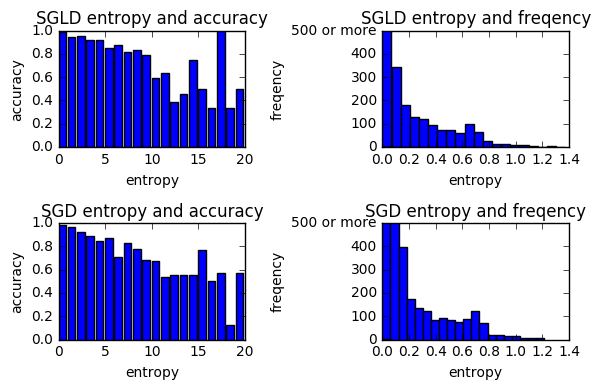

In [10]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pdb

data = np.loadtxt('SGLD/SGLDdata.csv', delimiter=',')

n = 20
x = np.arange(n)
y_sum = np.zeros(n)
y = np.zeros(n)
sec = np.arange(1,n).astype(np.float32) / n * data[:, 0].max()

for i in xrange(10000):
    index = 0
    for s in sec:
        if data[i][0] < s:
            break
        else:
            index += 1
    y_sum[index] += 1.
    if data[i][1] == data[i][2]:
        y[index] += 1.

y = y / y_sum

plt.subplot(221)
plt.bar(x, y)
plt.title('SGLD entropy and accuracy')
plt.xlabel('entropy')
plt.ylabel('accuracy')

plt.subplot(222)
plt.hist(data[:,0], bins=20)
plt.title('SGLD entropy and freqency')
plt.xlabel('entropy')
plt.ylabel('freqency')
plt.ylim(0, 500)
plt.yticks([0, 100, 200, 300, 400, 500], ['0', '100', '200', '300', '400', '500 or more'])

data = np.loadtxt('SGD/SGDdata.csv', delimiter=',')

n = 20
x = np.arange(n)
y_sum = np.zeros(n)
y = np.zeros(n)
sec = np.arange(1,n).astype(np.float32) / n * data[:, 0].max()

for i in xrange(10000):
    index = 0
    for s in sec:
        if data[i][0] < s:
            break
        else:
            index += 1
    y_sum[index] += 1.
    if data[i][1] == data[i][2]:
        y[index] += 1.

y = y / y_sum

plt.subplot(223)
plt.bar(x, y)
plt.title('SGD entropy and accuracy')
plt.xlabel('entropy')
plt.ylabel('accuracy')

plt.subplot(224)
plt.hist(data[:,0], bins=20)
plt.title('SGD entropy and freqency')
plt.xlabel('entropy')
plt.ylabel('freqency')
plt.ylim(0, 500)
plt.yticks([0, 100, 200, 300, 400, 500], ['0', '100', '200', '300', '400', '500 or more'])

plt.tight_layout()

plt.show()